<a href="https://colab.research.google.com/github/platypusjerry/BTP--Data-Driven-Design/blob/main/BTP_DDCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fsspec

     |████████████████████████████████| 118 kB 5.2 MB/s 


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline  
import urllib.request
from urllib.request import urlopen
import requests
from google.colab import files
import io

In [3]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance as sci

In [ ]:
'''
from google.colab import files
uploaded = files.upload()
'''

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df_main = pd.read_excel('/content/drive/MyDrive/DATA/NEW_DAT/irreg_holes/features_train.xlsx')
df_test = pd.read_excel('/content/drive/MyDrive/DATA/NEW_DAT/quadrant/features_test.xlsx')

In [9]:
df_main.head(5)

,Node Number,X Location (m),Y Location (m),Z Location (m),Directional Deformation (m),Total Deformation (m),Equivalent Elastic Strain (m/m),Maximum Principal Elastic Strain (m/m),Strain Energy (J),Maximum Principal Stress (Pa),Equivalent (von-Mises) Stress (Pa)
0,1,0.116440,0.005,0.11275,7.053900e-09,2.253000e-08,6.165800e-07,6.310100e-07,5.896100e-09,143260.0,134270.0
1,2,0.116440,0.010,0.11275,7.102900e-09,2.247700e-08,6.176700e-07,6.358100e-07,3.853300e-09,145200.0,134510.0
2,3,0.116440,0.015,0.11275,7.102900e-09,2.247700e-08,6.176700e-07,6.358100e-07,6.795600e-09,145200.0,134510.0
3,4,0.116440,0.020,0.11275,7.053900e-09,2.253000e-08,6.165800e-07,6.310100e-07,6.613400e-09,143260.0,134270.0
4,5,0.067054,0.005,0.10712,6.750600e-09,1.769700e-08,3.374600e-07,3.461400e-07,4.461600e-09,81362.0,73496.0


In [113]:
df_test.head(5)

,Node Number,X Location (m),Y Location (m),Z Location (m),Directional Deformation (m),Total Deformation (m),Equivalent Elastic Strain (m/m),Maximum Principal Elastic Strain (m/m),Strain Energy (J),Equivalent (von-Mises) Stress (Pa),Maximum Principal Stress (Pa)
0,1,0.052503,0.004398,0.089139,-0.000023,0.000334,0.005679,0.002419,0.086290,1235200000,186000000.0
1,2,0.052503,0.008797,0.089139,-0.000023,0.000333,0.005650,0.002390,0.080515,1228700000,180090000.0
2,3,0.052503,0.013195,0.089139,-0.000023,0.000334,0.005679,0.002419,0.080515,1235200000,186000000.0
3,4,0.069750,0.004398,0.115080,0.000005,0.000522,0.003442,0.002011,0.086290,748240000,262600000.0
4,5,0.069750,0.008797,0.115080,0.000006,0.000522,0.003407,0.002017,0.177490,740840000,270530000.0


Text(0.5, 0, 'Directionnal Deformation (m)')

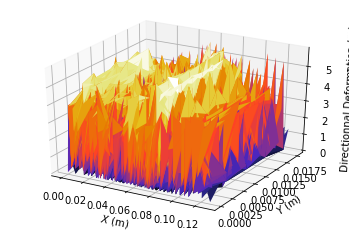

In [6]:
X = df_test['X Location (m)']
Y = df_test['Y Location (m)']
Z = df_main['Total Deformation (m)']

ax = plt.axes(projection='3d')
ax.plot_trisurf(X, Y, Z, cmap=plt.cm.CMRmap)

ax.set_xlabel('$X$ (m)')
ax.set_ylabel('$Y$ (m)')
ax.set_zlabel('Directionnal Deformation (m)')


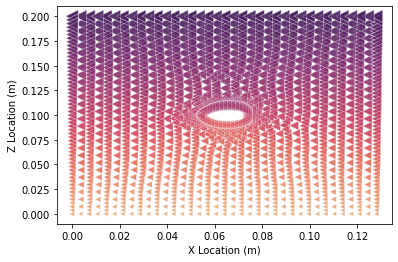

In [7]:
sns.scatterplot(x="X Location (m)", y="Z Location (m)", data=df_test, hue='Total Deformation (m)', size="Total Deformation (m)", sizes=(20, 150),
                palette=sns.color_palette("flare", as_cmap=True), alpha=0.4, legend=False, marker="<")

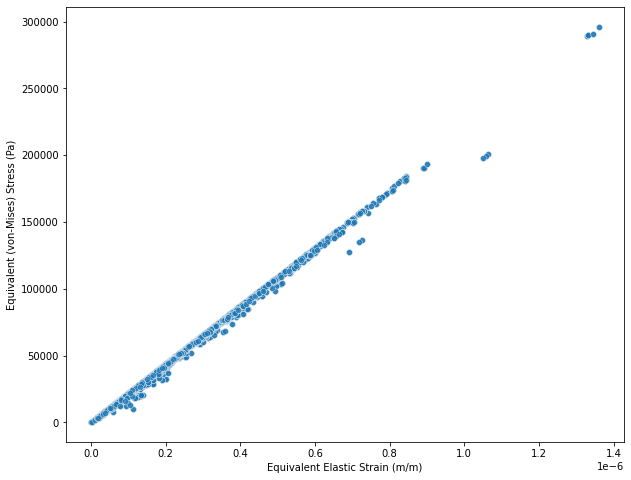

In [13]:
fig = plt.gcf()
dftemp = [df_main['Equivalent (von-Mises) Stress (Pa)'], df_main['Equivalent Elastic Strain (m/m)']]
df3 = pd.concat(dftemp, axis=1, keys=['Equivalent (von-Mises) Stress (Pa)', 'Equivalent Elastic Strain (m/m)'])

fig.set_size_inches(10, 8)
sns.scatterplot(data=df3, y="Equivalent (von-Mises) Stress (Pa)", x="Equivalent Elastic Strain (m/m)", alpha=0.7)

In [5]:
df_train = df_main[['X Location (m)', 'Y Location (m)', 'Z Location (m)', 'Total Deformation (m)', 'Equivalent Elastic Strain (m/m)']]
X_train = df_train.to_numpy()
print(X_train)

[[1.1644e-01 5.0000e-03 1.1275e-01 2.2530e-08 6.1658e-07]
 [1.1644e-01 1.0000e-02 1.1275e-01 2.2477e-08 6.1767e-07]
 [1.1644e-01 1.5000e-02 1.1275e-01 2.2477e-08 6.1767e-07]
 ...
 [2.6642e-02 0.0000e+00 6.6934e-02 6.4365e-09 1.0408e-07]
 [2.3477e-02 0.0000e+00 6.5107e-02 5.1276e-09 1.6675e-07]
 [2.0893e-02 0.0000e+00 6.2523e-02 4.3280e-09 1.4966e-07]]


In [6]:
df_y = df_main['Equivalent (von-Mises) Stress (Pa)']
y_train = df_y.to_numpy()
print(y_train)

[134270. 134510. 134510. ...  22102.  35738.  32169.]


In [7]:
reg = make_pipeline(StandardScaler(),
                   SGDRegressor(max_iter=1000, tol=1e-3, early_stopping=True, validation_fraction=0.4))

reg.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [8]:
df_temp_test = df_test[['X Location (m)', 'Y Location (m)', 'Z Location (m)', 'Total Deformation (m)', 'Equivalent Elastic Strain (m/m)']]
X_test = df_temp_test.to_numpy()

In [9]:
pred = reg.predict(X_test)
pred

array([1.22818489e+09, 1.22178898e+09, 1.22818492e+09, ...,
       8.63595697e+08, 8.98905078e+08, 9.38773283e+08])

In [10]:
xd = pd.DataFrame(data=pred, columns=['Predicted stress field (Pa)'])
#pd.to_csv("pred_result.csv")
'''
https://drive.google.com/file/d/1q9OaAMFo8YKhOEHgl76lBFaTih3j3uXl/view?usp=sharing
'''

'\nhttps://drive.google.com/file/d/1q9OaAMFo8YKhOEHgl76lBFaTih3j3uXl/view?usp=sharing\n'

In [11]:
plt_temp = df_test[['X Location (m)', 'Y Location (m)', 'Z Location (m)', 'Total Deformation (m)' ]]
df_plot = pd.concat([xd, plt_temp], axis=1)
df_plot

,Predicted stress field (Pa),X Location (m),Y Location (m),Z Location (m),Total Deformation (m)
0,1.228185e+09,0.052503,0.004398,0.089139,0.000334
1,1.221789e+09,0.052503,0.008797,0.089139,0.000333
2,1.228185e+09,0.052503,0.013195,0.089139,0.000334
3,7.508586e+08,0.069750,0.004398,0.115080,0.000522
4,7.435031e+08,0.069750,0.008797,0.115080,0.000522
...,...,...,...,...,...
11332,8.284153e+08,0.039111,0.000000,0.000000,0.000000
11333,8.430595e+08,0.032000,0.000000,0.000000,0.000000
11334,8.635957e+08,0.024889,0.000000,0.000000,0.000000
11335,8.989051e+08,0.017778,0.000000,0.000000,0.000000


In [ ]:
#sns.scatterplot(x="X Location (m)", y="Z Location (m)", data=df_plot, hue='Predicted stress field', size="Predicted stress field", sizes=(20, 150),
#               palette=sns.color_palette("flare", as_cmap=True), alpha=0.4, legend=False, marker="<")

In [12]:
from sklearn.metrics.pairwise import paired_distances
actual_stress = df_test['Equivalent (von-Mises) Stress (Pa)'].to_numpy()
X = actual_stress.reshape(-1,1)
Y = pred.reshape(-1,1)
z = paired_distances(X, Y)
df_error = pd.DataFrame(data=z, columns=['error_dist'])
df_error



,error_dist
0,7.015106e+06
1,6.911020e+06
2,7.015081e+06
3,2.618647e+06
4,2.663093e+06
...,...
11332,9.354653e+06
11333,9.470511e+06
11334,9.674303e+06
11335,9.864922e+06


In [13]:
df_1 = df_test[['X Location (m)', 'Z Location (m)']]
err_check = pd.concat([df_1, df_error], axis=1)
err_check

,X Location (m),Z Location (m),error_dist
0,0.052503,0.089139,7.015106e+06
1,0.052503,0.089139,6.911020e+06
2,0.052503,0.089139,7.015081e+06
3,0.069750,0.115080,2.618647e+06
4,0.069750,0.115080,2.663093e+06
...,...,...,...
11332,0.039111,0.000000,9.354653e+06
11333,0.032000,0.000000,9.470511e+06
11334,0.024889,0.000000,9.674303e+06
11335,0.017778,0.000000,9.864922e+06


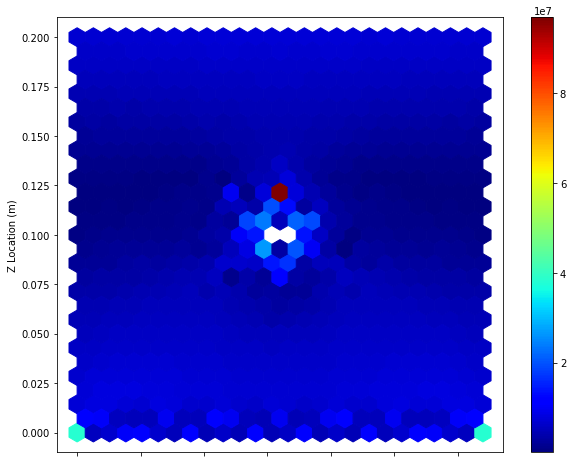

In [35]:
plot = err_check.plot.hexbin(x="X Location (m)", y="Z Location (m)", C="error_dist", 
                             xlabel="X location (m)", cmap='jet', gridsize=25, figsize=(10,8), legend=True)